In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import math

## Question 1

### Question 1.1

In [2]:
netflix = pd.read_csv('netflix_titles.csv',delimiter=',')
display(netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
# Question 1.1.1
number_entries = netflix.shape[0]
print("Number of entries in this dataset is:",number_entries)
print()
print("Range/mean/max/etc of the variables\n",netflix.describe())
movies = netflix[netflix.type=='Movie']
unique,count = np.unique(movies['type'].values,return_counts=True)
print()
print("Number of unique movies:",count[0])
series = netflix[netflix.type=='TV Show']
unique2,count2 = np.unique(series['type'].values,return_counts=True)
print()
print("Number of unique series:",count2[0])
print()
print("Different ratings provided:",netflix['rating'].unique())
print()
print("Range of years of content:",netflix['release_year'].max() - netflix['release_year'].min())

Number of entries in this dataset is: 8807

Range/mean/max/etc of the variables
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Number of unique movies: 6131

Number of unique series: 2676

Different ratings provided: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Range of years of content: 96


In [4]:
# Question 1.1.2
count = netflix.isna().sum()
print("Number of missing values per column:\n",count)
print()
duplicates = netflix.duplicated()
print("Duplicate rows listed below:\n",duplicates)
print()
number_of_duplicates = duplicates.sum()
print("Number of duplicate rows:",number_of_duplicates)

Number of missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Duplicate rows listed below:
 0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

Number of duplicate rows: 0


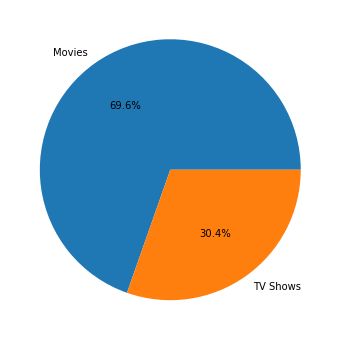

In [5]:
# Question 1.1.4
movies = netflix[netflix.type=='Movie']
series = netflix[netflix.type=='TV Show']

types = np.array([movies.shape[0],series.shape[0]])
labels = ["Movies","TV Shows"]

plt.figure(figsize=(6,6))
plt.pie(types,labels=labels,autopct='%1.1f%%')
plt.show()

Above we can see that the number of movies is more than double the number of tv shows listed in the netflix USA database and as such we can visualise movies are more popular than TV Shows.

<Figure size 864x864 with 0 Axes>

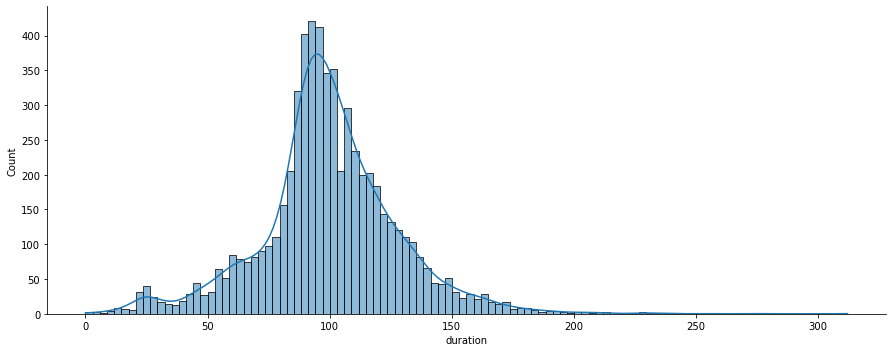

In [6]:
# Question 1.1.5
movies = netflix[netflix.type=='Movie']
series = netflix[netflix.type=='TV Show']

lenOfMovies = movies['duration']
lenOfMovies = lenOfMovies.fillna("0 min")

lenOfMovies = lenOfMovies.map(lambda x: x.rstrip('min')).astype(float)

number_of_seasons = series['duration']
number_of_seasons = number_of_seasons.fillna("0 Seasons")

number_of_seasons = number_of_seasons.map(lambda x: x.rstrip('Seasons')).astype(int)


plt.figure(figsize=(12,12))
sns.displot(lenOfMovies,kde=True,aspect=2.5)
plt.show()



<Figure size 864x864 with 0 Axes>

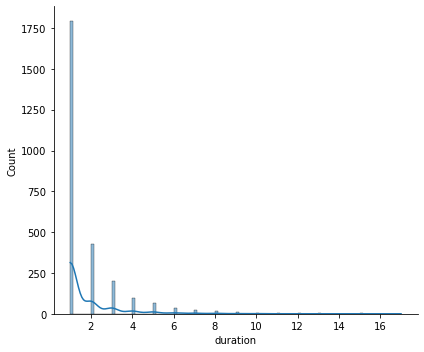

In [7]:
plt.figure(figsize=(12,12))
sns.displot(number_of_seasons,aspect=1.2,kde=True)
plt.show()

Above we can see the distribution of the movie durations highlighted in the first graph and the distribution of number of seasons is shown as a bar graph as the second plot. Many movies last about 100 minutes long and the number of seasons for most shows end at season 1 or 2 :(

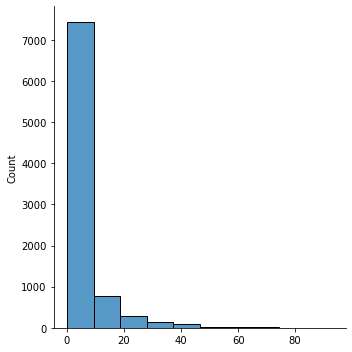

In [8]:
# Question 1.1.6 
Netflix_copy = netflix.copy()
Dates = Netflix_copy[["date_added","release_year"]]
Dates = Dates.dropna()
#display(Dates)
Dates['date_added'] = pd.to_datetime(Dates['date_added'])
Year_added = Dates['date_added'].dt.year.astype(int)
Created = Dates['release_year'].astype(int)

ans = Year_added - Created

ans = ans[ans>=0] # remove all instances where date_added is below release_year for obvious reasons

sns.displot(ans,bins=10)
plt.show()

Majority of content on netflix, we can see is added to Netflix between 0-10 years after their release date.This implies the content is fresh and new for the most part of it. Netflix produced content can be identified by seeing whether the year the content was released and the year the content was added to netflix is equal to zero.

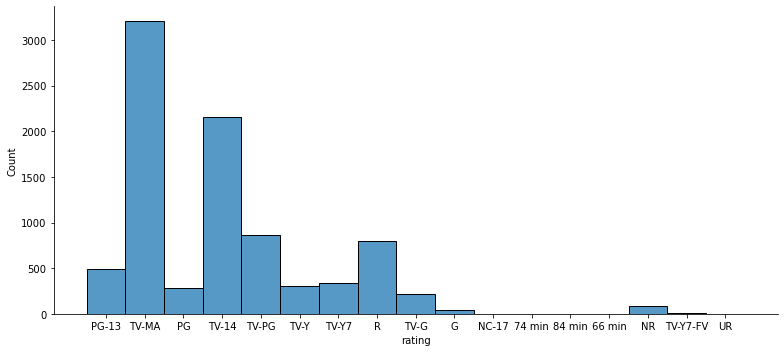

In [9]:
# Question 1.1.7
rating = netflix.copy()
sns.displot(rating['rating'].dropna(), aspect=2.2)
plt.show()

Majority of the ratings are TV-MA ratings and a small amount belong to NR and UR ratings. So this highlights that most content is for mature audiences, ages 17 and under. NR and UR would mean that those movies arent rated indicating Netflix adds alot of movies that were rated rather than not.

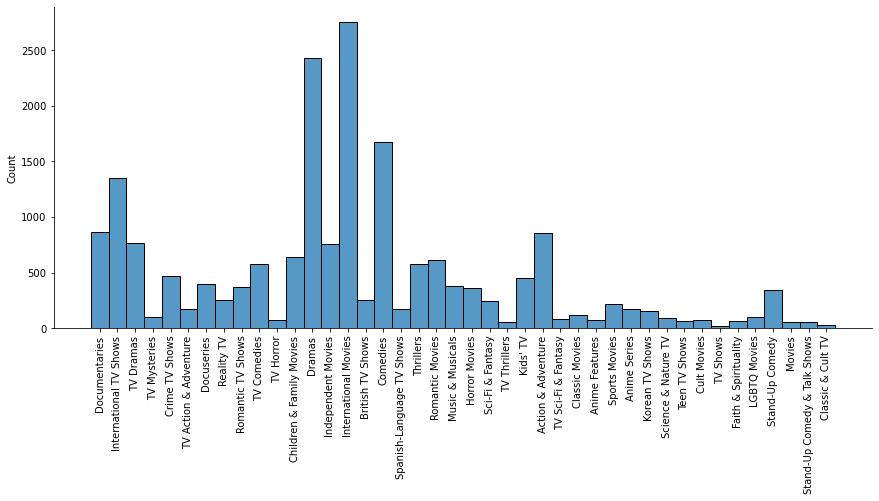

In [10]:
# Question 1.1.8
genre = netflix.copy()
temp = []
for i in range(genre.shape[0]):
    temp2 = genre.iloc[i]['listed_in'].split(", ")
    for j in temp2:
        temp.append(j)
genres = np.array(temp)
unique,count = np.unique(genres,return_counts=True)
genres = pd.Series(genres)
ax = sns.displot(genres, aspect=2.5)
ax.set_xticklabels(rotation=90)

The top 3 genres are :
* International movies
* Dramas
* Comedies

,date_added,type
0,"September 25, 2021",Movie
1,"September 24, 2021",TV Show
2,"September 24, 2021",TV Show
3,"September 24, 2021",TV Show
4,"September 24, 2021",TV Show
...,...,...
8802,"November 20, 2019",Movie
8803,"July 1, 2019",TV Show
8804,"November 1, 2019",Movie
8805,"January 11, 2020",Movie


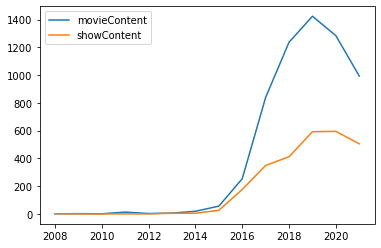

In [11]:
# Question 1.1.9
dates = netflix.copy()
dates = dates[["date_added","type"]]
dates = dates.dropna()
display(dates)
dates['date_added'] = pd.to_datetime(dates['date_added'])

movies = dates[dates.type=="Movie"]
show = dates[dates.type=="TV Show"]

Movie2008 = movies[movies.date_added.dt.year==2008]
Movie2009 = movies[movies.date_added.dt.year==2009]
Movie2010 = movies[movies.date_added.dt.year==2010]
Movie2011 = movies[movies.date_added.dt.year==2011]
Movie2012 = movies[movies.date_added.dt.year==2012]
Movie2013 = movies[movies.date_added.dt.year==2013]
Movie2014 = movies[movies.date_added.dt.year==2014]
Movie2015 = movies[movies.date_added.dt.year==2015]
Movie2016 = movies[movies.date_added.dt.year==2016]
Movie2017 = movies[movies.date_added.dt.year==2017]
Movie2018 = movies[movies.date_added.dt.year==2018]
Movie2019 = movies[movies.date_added.dt.year==2019]
Movie2020 = movies[movies.date_added.dt.year==2020]
Movie2021 = movies[movies.date_added.dt.year==2021]

Show2008 = show[show.date_added.dt.year==2008]
Show2009 = show[show.date_added.dt.year==2009]
Show2010 = show[show.date_added.dt.year==2010]
Show2011 = show[show.date_added.dt.year==2011]
Show2012 = show[show.date_added.dt.year==2012]
Show2013 = show[show.date_added.dt.year==2013]
Show2014 = show[show.date_added.dt.year==2014]
Show2015 = show[show.date_added.dt.year==2015]
Show2016 = show[show.date_added.dt.year==2016]
Show2017 = show[show.date_added.dt.year==2017]
Show2018 = show[show.date_added.dt.year==2018]
Show2019 = show[show.date_added.dt.year==2019]
Show2020 = show[show.date_added.dt.year==2020]
Show2021 = show[show.date_added.dt.year==2021]

movieContent = [len(Movie2008),len(Movie2009),len(Movie2010),len(Movie2011),len(Movie2012),len(Movie2013),len(Movie2014),len(Movie2015),len(Movie2016),len(Movie2017),len(Movie2018),len(Movie2019),len(Movie2020),len(Movie2021)]
showContent = [len(Show2008),len(Show2009),len(Show2010),len(Show2011),len(Show2012),len(Show2013),len(Show2014),len(Show2015),len(Show2016),len(Show2017),len(Show2018),len(Show2019),len(Show2020),len(Show2021)]
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

plt.plot(years, movieContent, label = "movieContent")
plt.plot(years, showContent, label = "showContent")
plt.legend()
plt.show()

Movies are added more regularly according to this graph which makes sense as you can watch a movie in one sitting whereas series require time and as such Netflix should have to be up to date with movies more often that series

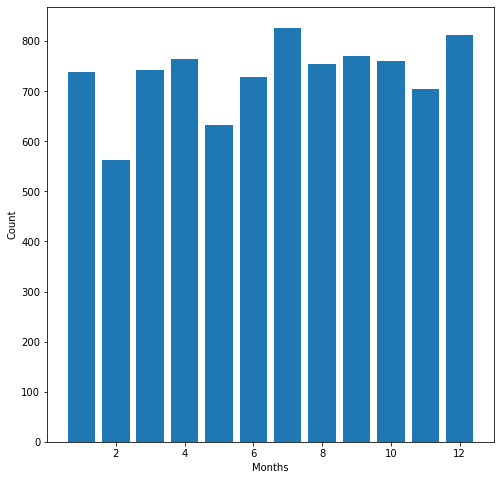

In [12]:
# Question 1.1.10 (Both months and days will be done below)
temp = netflix.copy()
temp["date_added"] = pd.to_datetime(temp['date_added'])
months = temp['date_added'].dt.month

tempMonth = months.value_counts()
plt.figure(figsize=(8,8))
plt.bar(tempMonth.index, tempMonth.values)
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

Some trend could be noticed as during holiday months more content is uploaded but this is only by a small difference.

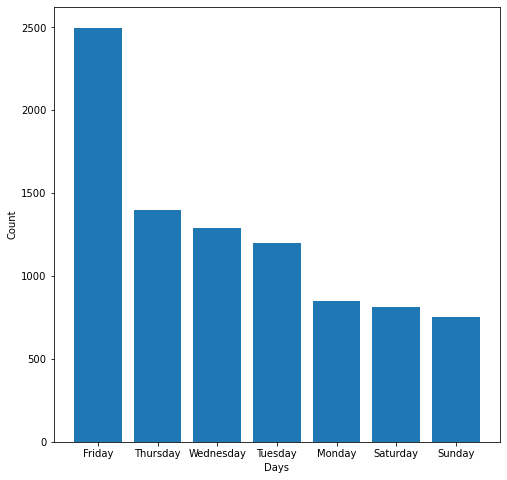

In [13]:
temp = netflix.copy()
temp["date_added"] = pd.to_datetime(temp['date_added'])
days = temp["date_added"].dt.day_name()

tempDay = days.value_counts()
plt.figure(figsize=(8,8))
plt.bar(tempDay.index, tempDay.values)
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

When looking at days of the week it is quite apparent that the most content is uploaded on a friday, or should i say FriYay!!!

### Question 1.2

In [14]:
# Question 1.2.1
basics = pd.read_csv('title.basics_small.tsv.gz', delimiter='\t')
ratings = pd.read_csv('title.ratings_small.tsv.gz', delimiter='\t')

In [15]:
netflix_copy = netflix.copy()
result = pd.merge(basics, ratings, on=["tconst"])
netflix_copy = netflix_copy[netflix_copy.type=="Movie"]

In [16]:
final = pd.merge(netflix_copy,result,left_on='title',right_on='primaryTitle')

In [17]:
final

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,0,89,"Documentary,Drama",7.4,5870
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,movie,My Little Pony: A New Generation,My Little Pony: A New Generation,0,2021,0,90,"Adventure,Animation,Comedy",6.9,2702
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,movie,Sankofa,Sankofa,0,1993,0,125,Drama,7.0,617
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,movie,The Starling,The Starling,0,2021,0,102,"Comedy,Drama",6.3,9145
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,movie,Je Suis Karl,Je Suis Karl,0,2021,0,126,"Drama,Romance,Thriller",5.4,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,short,Zoom,Zoom,0,2020,0,36,"Horror,Short,Thriller",5.7,18
13521,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
13522,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
13523,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,short,Zubaan,Zubaan,0,2018,0,25,"Crime,Drama,Short",8.0,10


No as certain movies have different genres for them and different time durations which makes no sense at all. This could appear due to the IMDB dataset containing multiple instances of the same movie but listed as a show or the same movie but made in different years.

In [18]:
# Question 1.2.2
basics2 = pd.read_csv('title.basics_small.tsv.gz', delimiter='\t')
ratings2 = pd.read_csv('title.ratings_small.tsv.gz', delimiter='\t')

netflix_copy2 = netflix.copy()
result2 = pd.merge(basics2, ratings2, on=["tconst"])
netflix_copy2 = netflix_copy2[netflix_copy2.type=="Movie"]

In [19]:
banned = ['Is','is','the','The','a','A','of','Of','and','And']
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
result2['primaryTitle'] = result2['primaryTitle'].apply(f)
netflix_copy2['title'] = netflix_copy2['title'].apply(f)
final2 = pd.merge(netflix_copy2,result2,left_on='title',right_on='primaryTitle')

In [20]:
final2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,movie,Dick Johnson Dead,Dick Johnson Is Dead,0,2020,0,89,"Documentary,Drama",7.4,5870
1,s7,Movie,My Little Pony: New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,movie,My Little Pony: New Generation,My Little Pony: A New Generation,0,2021,0,90,"Adventure,Animation,Comedy",6.9,2702
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,movie,Sankofa,Sankofa,0,1993,0,125,Drama,7.0,617
3,s10,Movie,Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,movie,Starling,The Starling,0,2021,0,102,"Comedy,Drama",6.3,9145
4,s10,Movie,Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,short,Starling,Starling,0,2020,0,11,"Horror,Short,Thriller",8.4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16774,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,short,Zoom,Zoom,0,2020,0,36,"Horror,Short,Thriller",5.7,18
16775,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
16776,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
16777,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,short,Zubaan,Zubaan,0,2018,0,25,"Crime,Drama,Short",8.0,10


The method i have chosen is to remove all strings such as the,and,of,etc and join on these renamed titles and as such the number of matches increased quite significantly from 13525 to 16779 rows

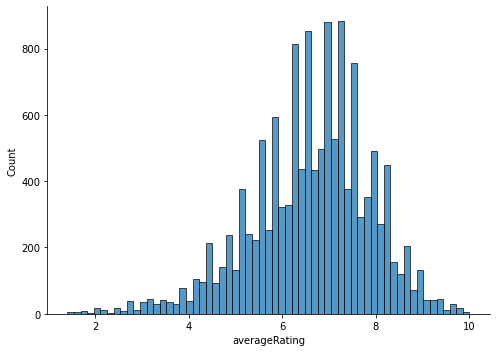

In [21]:
# Question 1.2.3
sns.displot(final.averageRating,aspect=1.4)

We can see Netflix has an average rating ranges between 6 and 8 which is quite good indicating it has a good quality library but its not great as the histogram is left tailed highlighting shows get lower ratings below 6rather than higher ratings above 8

<AxesSubplot:>

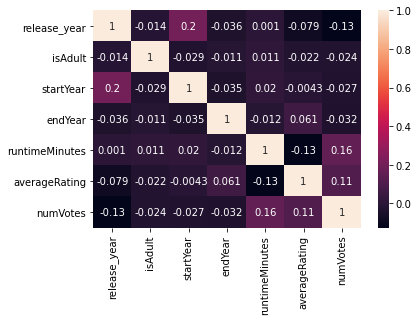

In [22]:
# Question 1.2.4
sns.heatmap(final.corr(),annot=True)

<AxesSubplot:xlabel='genres', ylabel='title'>

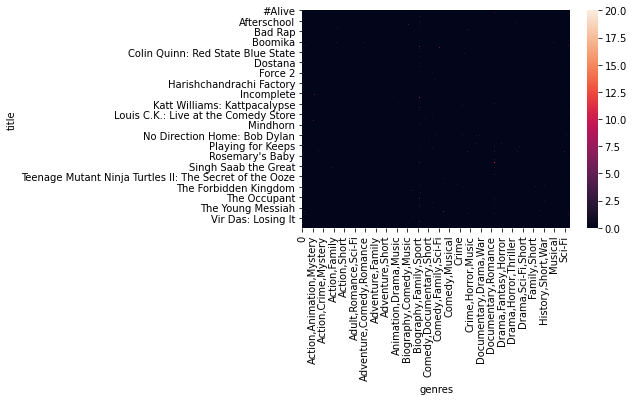

In [23]:
sns.heatmap(pd.crosstab(final.title,final.genres))

<AxesSubplot:xlabel='duration', ylabel='title'>

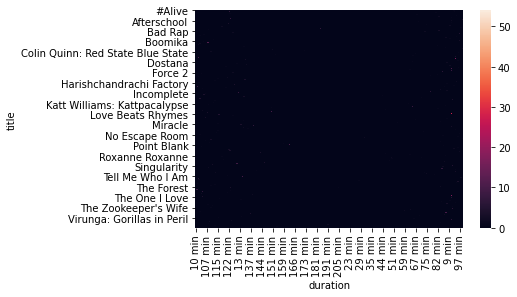

In [24]:
sns.heatmap(pd.crosstab(final.title,final.duration))

### Question 1.3

In [25]:
# Question 1.3.1
netflix_copy = netflix.copy()
netflix_copy_movie = netflix_copy[netflix_copy.type=="Movie"]
print("The number of missing directors:",netflix_copy_movie['director'].isna().sum())

The number of missing directors: 188


In [26]:
# Question 1.3.2
data = netflix_copy_movie['director'].copy().dropna()

temp = []
for i in range(data.shape[0]):
    curr = data.iloc[i].split(", ")
    for j in curr: 
        temp.append(j)

directors = pd.Series(temp).value_counts()
display(directors)

Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
Marcus Raboy        15
                    ..
Rachel Griffiths     1
Jacek Koprowicz      1
Robert Clouse        1
Monica Floyd         1
Vetrimaaran          1
Length: 4777, dtype: int64

In [27]:
crew = pd.read_csv('title.crew_small.tsv.gz', delimiter='\t')
name = pd.read_csv('name.basics_small.tsv.gz', delimiter='\t')
dirs = pd.merge(crew,name,left_on='directors',right_on='nconst')

In [28]:
dirs

,tconst,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000004,nm0721526,\N,nm0721526,Émile Reynaud,1844,1918,"director,animation_department,writer","tt2184231,tt0000003,tt13125956,tt2184201"
1,tt0000020,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
2,tt0229648,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
3,tt0282172,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
4,tt1199694,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
...,...,...,...,...,...,...,...,...,...
85402,tt9905412,nm10533890,nm10533895,nm10533890,Zam,\N,\N,director,\N
85403,tt9909920,nm2615138,\N,nm2615138,Thomas Winston,\N,\N,"producer,cinematographer,director","tt1749605,tt3076808"
85404,tt9910628,nm10536092,nm10536092,nm10536092,Daisy Leigh-Phippard,\N,\N,"script_department,writer,director","tt10098886,tt4123432,tt9132428,tt9910628"
85405,tt9915946,nm0652213,nm0652213,nm0652213,Luis Ospina,1949,2019,"director,writer,editor","tt1244730,tt0193438,tt0381135,tt0212522"


In [29]:
finalDirectors = pd.merge(final,dirs,left_on='tconst',right_on='tconst')

In [30]:
finalDirectors

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,7.4,5870,nm0990310,"nm1637105,nm0990310",nm0990310,Kirsten Johnson,\N,\N,"cinematographer,camera_department,producer","tt6328110,tt5375040,tt11394180,tt0390190"
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,7.0,617,nm0314340,nm0314340,nm0314340,Haile Gerima,1946,\N,"director,producer,writer","tt0083584,tt0108041,tt0073394,tt1284592"
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,6.3,9145,nm0577647,nm1358798,nm0577647,Theodore Melfi,1970,\N,"producer,director,writer","tt4846340,tt2170593,tt6018012,tt2568862"
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,5.4,613,nm2275000,nm0920910,nm2275000,Christian Schwochow,1978,\N,"director,writer,actor","tt1176699,tt5765988,tt1717152,tt6258718"
4,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,...,5.2,639,nm3061960,"nm3061960,nm0513106,nm12833828,nm5095403",nm3061960,Bruno Garotti,\N,\N,"assistant_director,writer,director","tt0800080,tt10329566,tt4634200,tt8716800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,4.4,20545,nm0382072,"nm0726472,nm1183854,nm0504670",nm0382072,Peter Hewitt,1962,\N,"director,writer,producer","tt0101452,tt0215591,tt0356634,tt0283054"
11371,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,5.7,18,nm11462931,nm10578702,nm11462931,Matthew Landford,\N,\N,director,"tt12171626,tt12062078"
11372,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,5.7,18,nm11462931,nm10578702,nm11462931,Matthew Landford,\N,\N,director,"tt12171626,tt12062078"
11373,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,8.0,10,nm9269619,nm9269619,nm9269619,Ojaswwee Sharma,\N,\N,"writer,director,cinematographer","tt11259700,tt7506628,tt11226108,tt8946762"


In [31]:
p = final.copy()
data = p['director'].copy().dropna()

temp = []
for i in range(data.shape[0]):
    curr = data.iloc[i].split(", ")
    for j in curr: 
        temp.append(j)

directors = pd.Series(temp).value_counts()
display(directors)

Youssef Chahine       91
Anton Corbijn         54
John G. Avildsen      53
Anees Bazmee          53
Onir                  47
                      ..
Robert Osman           1
Eric Notarnicola       1
Johanna Demetrakas     1
Xavier Manrique        1
Brian Webber           1
Length: 4068, dtype: int64

Originally Rajiv Chilaka has the most titles but after filling in the missing data we can see that Youssef Chahine has the most titles.

In [32]:
# Question 1.3.3
temp = directors[directors>3]

In [33]:
maxRating = final["averageRating"].max()
johnRating = final[final.director=="Youssef Chahine"]
johnValue = johnRating.averageRating
johnValue = johnValue.sum()
johnValue /= johnRating.shape[0]
print("Max rating is:",maxRating)
print()
print("John rating is:",johnValue)

Max rating is: 10.0

John rating is: 6.84065934065934


We see that Youssefs rating isnt the best rating from the above calculation despite appearing the most in the dataset

## Question 2

### Question 2.1

1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING

This is a key for the data represented below

In [34]:
y_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True, header=None)
X_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True, header=None)
subjects = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt',delim_whitespace=True, header=None)
features = list()
with open('UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
y_train_labels = y_train[0].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

In [35]:
final = X_train.copy()
final.columns = features
final['y_train'] = y_train.copy()
final['subjects'] = subjects.copy()
final['labels'] = y_train_labels

In [36]:
final # note the EDA done below is on the X_train merged with y_train merged with subjects_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_train,subjects,labels
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2,30,WALKING_UPSTAIRS


In [37]:
# Question 2.1.1
print("Number of entries:",final.shape[0])
print()
final.describe()

Number of entries: 7352



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_train,subjects
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000,30.000000


In the dataset there is 7352 entries in the dataset, multiple statistics for all the variables including the y_train and subject_train datasets are including in the dataframe above, including the mean, count, and max and min.

In [38]:
# Question 2.1.2
countMiss = final.isna().sum()
print("Number of missing values per column:\n",countMiss)
print()
duplicatesHuman = final.duplicated()
print("Duplicate rows listed below:\n",duplicatesHuman)
print()
number_of_duplicates_human = duplicatesHuman.sum()
print("Number of duplicate rows:",number_of_duplicates_human)
print()
print(countMiss[countMiss>0])

Number of missing values per column:
 tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
y_train                 0
subjects                0
labels                  0
Length: 564, dtype: int64

Duplicate rows listed below:
 0       False
1       False
2       False
3       False
4       False
        ...  
7347    False
7348    False
7349    False
7350    False
7351    False
Length: 7352, dtype: bool

Number of duplicate rows: 0

Series([], dtype: int64)


From above we can see that there are no duplicate entries and no missing values(indicated by the empty series printed directly above)

In [39]:
# Question 2.1.3
uniqueClass = final['labels'].value_counts()
uniqueUser = final['subjects'].value_counts()
print("Number of unique classes: \n",uniqueClass.sort_index())
print()
print("Number of unique users: \n",uniqueUser.sort_index())

Number of unique classes: 
 LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: labels, dtype: int64

Number of unique users: 
 1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
Name: subjects, dtype: int64


Distribution of classes



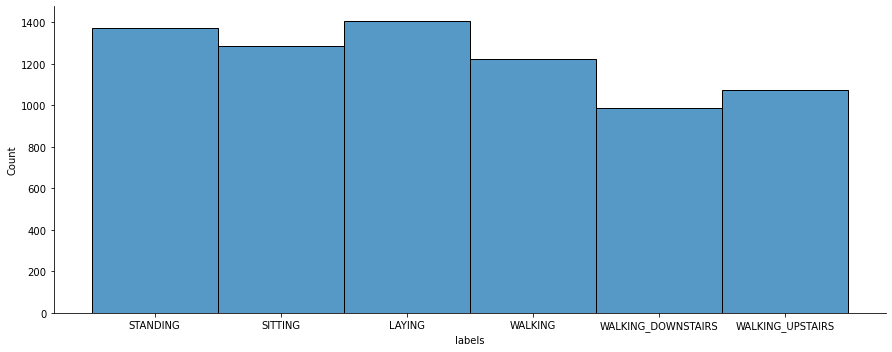


Distribution of users



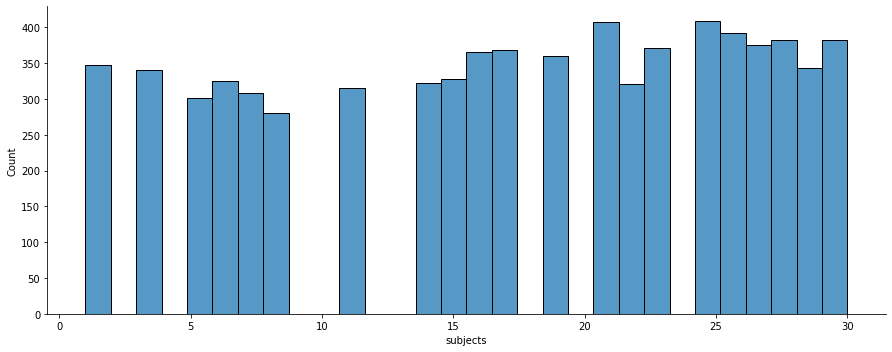

In [40]:
print("Distribution of classes\n")
sns.displot(final['labels'],aspect=2.5)
plt.show()
print()

print("Distribution of users\n")
sns.displot(final['subjects'],aspect=2.5,bins=30)
plt.show()

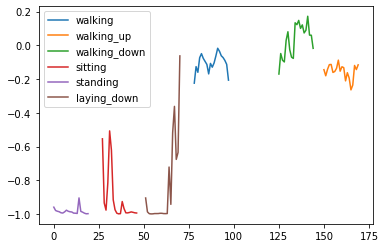

In [41]:
# Question 2.1.4
walking = final[final.y_train==1].copy()
walking_up = final[final.y_train==2].copy()
walking_down = final[final.y_train==3].copy()
sitting = final[final.y_train==4].copy()
standing = final[final.y_train==5].copy()
laying_down = final[final.y_train==6].copy()

plt.plot(walking['tBodyAccMag-mean()'][0:20],label='walking')
plt.plot(walking_up['tBodyAccMag-mean()'][0:20],label='walking_up')
plt.plot(walking_down['tBodyAccMag-mean()'][0:20],label='walking_down')
plt.plot(sitting['tBodyAccMag-mean()'][0:20],label='sitting')
plt.plot(standing['tBodyAccMag-mean()'][0:20],label='standing')
plt.plot(laying_down['tBodyAccMag-mean()'][0:20],label='laying_down')
plt.legend()
plt.show()

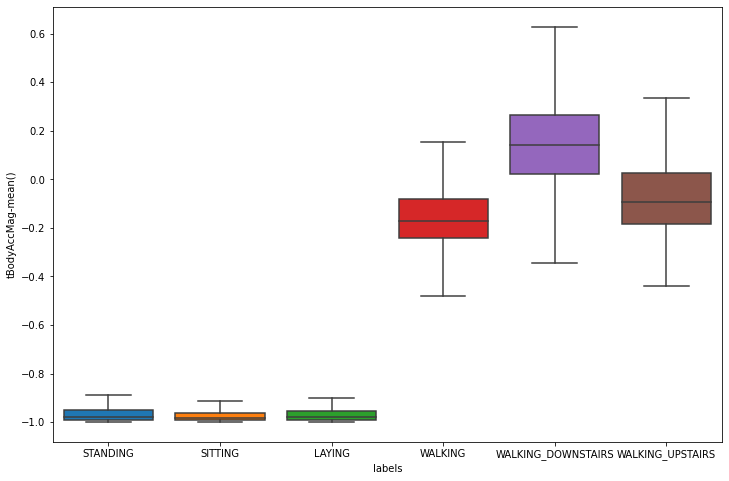

In [42]:
plt.figure(figsize=(12,8))
sns.boxplot(x='labels', y='tBodyAccMag-mean()',data=final, showfliers=False, saturation=1)
plt.show()

Clearly we can see that the tBodyAccMag-mean() variable is quite low for static movements and is between -0.5 and 0.6 for dynamic movements

In [43]:
# Question 2.1.5

If the tBodyAccMag-mean() reading is above -0.6 then the movement is dynamic else if the tBodyAccMag-mean() is below -0.8 its a static movement.

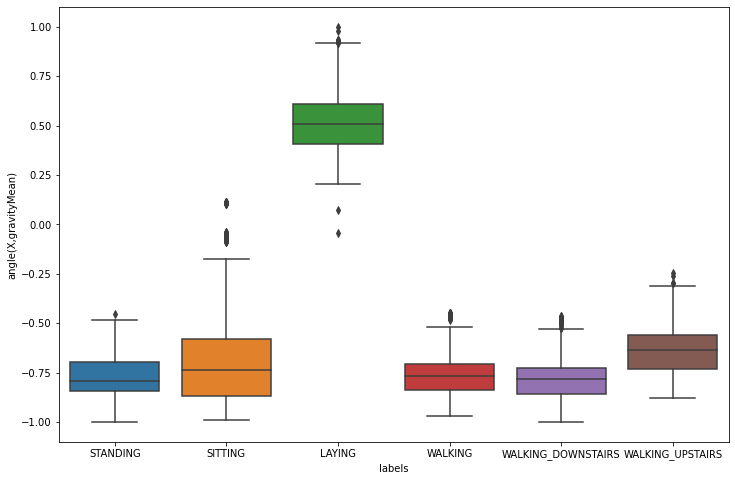

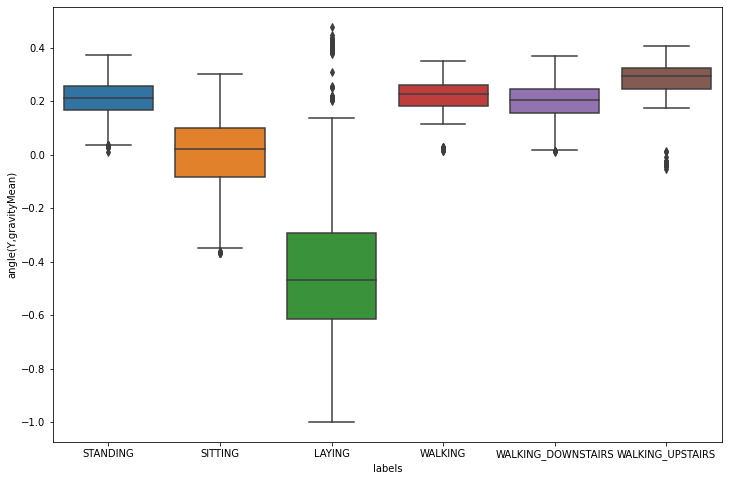

In [44]:
# Question 2.1.6
plt.figure(figsize=(12,8))
sns.boxplot(x='labels', y='angle(X,gravityMean)', data=final)
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='labels', y='angle(Y,gravityMean)', data=final)
plt.show()

Question 2.1.7


If angle between the x axis and gravity is positive then we know we laying down else we not laying down

In [45]:
# Question 2.1.8
from sklearn.manifold import TSNE
x = X_train.copy()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
x_embedded = tsne.fit_transform(x)

In [46]:
df = pd.DataFrame()
df['tsne-2d-one'] = x_embedded[:,0]
df['tsne-2d-two'] = x_embedded[:,1]
df['labels'] = final['labels']

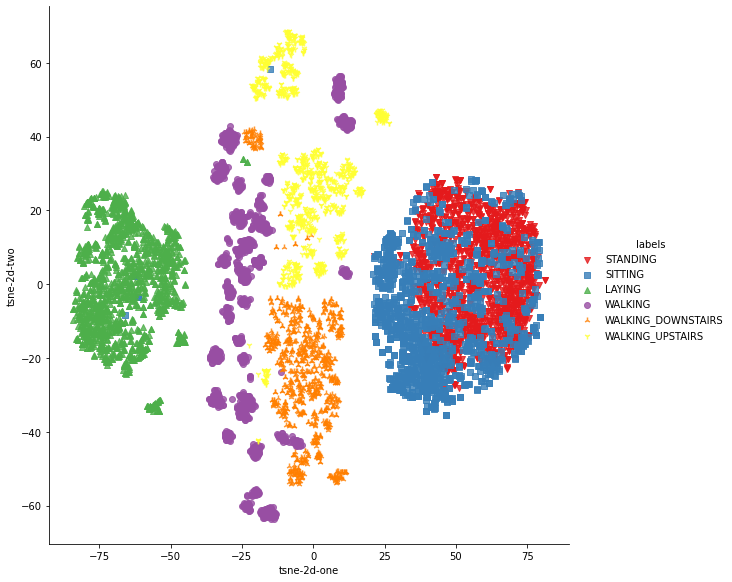

In [47]:
sns.lmplot(data=df, x='tsne-2d-one', y='tsne-2d-two', hue='labels', fit_reg=False, height=8,palette="Set1",markers=['v','s','^','o', '2','1'])
plt.show()

We can see that the data does seperate quite well except for standing and sitting activities where they cant be seperated which makes sense since the way you stand and sit is quite similar except for your position.

In [48]:
# Question 2.1.9
x = X_train.copy()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000)
x_embedded = tsne.fit_transform(x)

In [49]:
df2 = pd.DataFrame()
df2['tsne-2d-one'] = x_embedded[:,0]
df2['tsne-2d-two'] = x_embedded[:,1]
df2['labels'] = final['subjects']

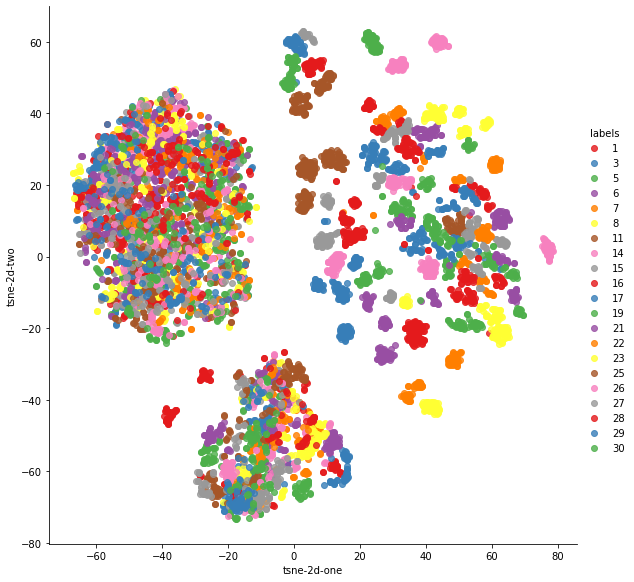

In [50]:
sns.lmplot(data=df2, x='tsne-2d-one', y='tsne-2d-two', hue='labels', fit_reg=False, height=8,palette="Set1")
plt.show()

Users are not seperable according to this dataset for the respective parameters i chose above.

In [51]:
# Question 2.1.10
walkingTemp = final[final.labels=='WALKING'].copy()
walkingTemp

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_train,subjects,labels
78,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,-0.154731,...,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,1,1,WALKING
79,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,-0.154731,...,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,1,1,WALKING
80,0.254867,0.003815,-0.123658,-0.275158,0.013080,-0.284371,-0.341341,-0.026013,-0.320272,-0.175559,...,0.372041,-0.106184,-0.923835,0.344459,-0.757414,0.264452,0.039417,1,1,WALKING
81,0.343370,-0.014446,-0.167377,-0.229924,0.173911,-0.213388,-0.282882,0.144693,-0.237987,-0.152773,...,-0.378574,-0.582073,-0.886349,0.063337,-0.762534,0.260850,0.039735,1,1,WALKING
82,0.276240,-0.029638,-0.142616,-0.226577,0.164288,-0.122545,-0.239526,0.140287,-0.148617,-0.152773,...,-0.072906,0.656842,-0.291200,0.077922,-0.763968,0.259629,0.041412,1,1,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0.368741,-0.037037,-0.171345,-0.289275,-0.112248,-0.012563,-0.318009,-0.100526,-0.005713,-0.017236,...,-0.441337,-0.035316,0.519782,0.262583,-0.898166,0.166580,0.000164,1,30,WALKING
7290,0.283921,-0.026589,-0.119525,-0.275639,-0.082424,-0.067783,-0.319503,-0.073029,-0.072464,0.021704,...,-0.172714,0.598862,0.391946,0.118377,-0.896800,0.168436,0.004581,1,30,WALKING
7291,0.208795,-0.011955,-0.070286,-0.255750,-0.143239,-0.136999,-0.316191,-0.146158,-0.151520,0.021704,...,0.541563,0.722410,0.438473,0.186591,-0.892379,0.171724,0.005806,1,30,WALKING
7292,0.207863,-0.019810,-0.051942,-0.278117,-0.136085,-0.082025,-0.334822,-0.154721,-0.079207,-0.148386,...,0.402823,-0.533675,-0.172064,-0.451897,-0.887386,0.174095,-0.000384,1,30,WALKING


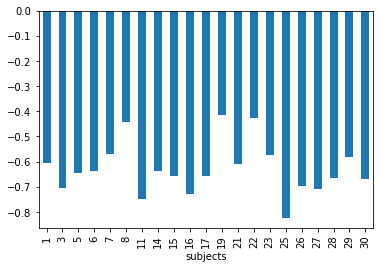

In [52]:
means = walkingTemp.groupby(['subjects']).mean()
tBodyAccMag_energy = means['tBodyAccMag-energy()']
tBodyAccMag_energy.plot.bar()
plt.show()

User 25 exerts the most energy and user 19 and user 22 exerts the least amount of energy.

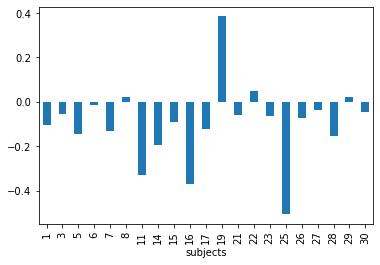

In [53]:
tBodyAcc_max = means['tBodyAcc-max()-X']
tBodyAcc_max.plot.bar()
plt.show()

User 19 and user 25 have the fastest body acceleration according to the graph seen above just in opposite directions as we know acceleration is a vector in terms of physics and has a direction as well as magnitude

In [54]:
# Question 2.1.11
walkingUpTemp = final[final.labels=='WALKING_UPSTAIRS'].copy()
walkingUpTemp

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_train,subjects,labels
150,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,0.087381,-0.220939,...,0.198799,-0.515058,-0.960808,0.798595,-0.730180,0.275743,0.075790,2,1,WALKING_UPSTAIRS
151,0.279183,-0.036966,-0.133604,-0.359032,-0.124112,-0.102868,-0.394230,-0.120456,-0.027792,-0.319136,...,-0.183312,-0.366714,-0.932361,0.257390,-0.695481,0.303214,0.065482,2,1,WALKING_UPSTAIRS
152,0.301162,-0.001759,-0.106830,-0.362666,0.001220,-0.111538,-0.400837,-0.001549,-0.028194,-0.269518,...,-0.140795,-0.235431,-0.904871,-0.524824,-0.681620,0.311837,0.070519,2,1,WALKING_UPSTAIRS
153,0.293411,-0.018715,-0.066159,-0.368157,0.095663,-0.019262,-0.430579,0.108432,0.027044,-0.169848,...,-0.099332,-0.413970,-0.968821,-0.132384,-0.686715,0.308243,0.070468,2,1,WALKING_UPSTAIRS
154,0.230310,0.002174,-0.043103,-0.335254,-0.020444,0.031210,-0.398985,-0.039489,0.097693,-0.169848,...,0.360594,0.455744,0.777628,-0.057846,-0.693267,0.306133,0.058967,2,1,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2,30,WALKING_UPSTAIRS


In [55]:
meansUp = walkingUpTemp.groupby(['subjects']).mean()

In [56]:
meansUp

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_train
subjects,,,,,,,,,,,,,,,,,,,,,
1,0.255462,-0.023953,-0.097302,-0.354708,-0.002320,-0.019479,-0.402833,0.007677,0.035991,-0.159449,...,-0.438560,-0.759060,0.096086,-0.061084,-0.194700,0.065684,-0.647196,0.334763,0.074166,2
3,0.260820,-0.032411,-0.110065,-0.313123,0.011628,-0.369755,-0.359019,-0.004484,-0.348964,-0.153548,...,-0.233610,-0.567095,0.013489,0.115177,-0.263078,0.030399,-0.600971,0.346985,0.134294,2
5,0.268459,-0.032527,-0.107471,-0.045724,0.185022,-0.308939,-0.116971,0.190486,-0.291142,0.170155,...,-0.030296,-0.360324,-0.020422,-0.077229,-0.293346,0.112447,-0.754346,0.266611,0.037869,2
6,0.268229,-0.027243,-0.122082,-0.050135,0.189276,-0.353520,-0.116208,0.144945,-0.354623,0.266700,...,-0.014897,-0.322224,0.008641,0.003211,0.128194,-0.099365,-0.679096,0.318508,0.034533,2
7,0.248707,-0.027564,-0.143770,-0.294873,-0.326160,-0.145665,-0.337432,-0.343620,-0.135162,-0.133247,...,-0.269129,-0.634027,0.017580,0.014003,0.106104,-0.117697,-0.519312,0.248699,0.312062,2
8,0.258880,-0.028242,-0.115122,-0.171712,0.348769,0.121187,-0.216101,0.318981,0.123366,-0.060347,...,-0.495114,-0.796998,0.076727,-0.097934,-0.389305,0.066378,-0.613935,0.285923,0.160697,2
11,0.263776,-0.030316,-0.106797,-0.238803,-0.103168,-0.203369,-0.293611,-0.101751,-0.161751,-0.050171,...,-0.466849,-0.789636,-0.016858,-0.063290,-0.009557,-0.070859,-0.645454,0.321428,-0.080538,2
14,0.262421,-0.020439,-0.112280,-0.309397,0.307196,0.609018,-0.359355,0.287753,0.542642,-0.075739,...,-0.570583,-0.849483,0.072254,-0.009154,-0.223951,0.133237,-0.379674,0.311607,0.390444,2
15,0.270188,-0.028752,-0.116952,-0.026097,-0.004065,-0.379717,-0.113884,0.022702,-0.357324,0.236095,...,-0.609836,-0.878466,0.044357,-0.022176,-0.366352,0.167930,-0.696283,0.300676,-0.034670,2


In [57]:
# Question 2.1.12

The feasibility of identifying users is quite difficult for the 30 users as the data is quite similar for each user and multiple if statements would need to be conjured up in order to classify a user correctly.

### Question 2.2

In [58]:
# Question 2.2.1

In [59]:
rs = 42 # random state constant

In [60]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.metrics import f1_score
import time

In [61]:
y_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True, header=None)
X_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True, header=None)
subjects_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt',delim_whitespace=True, header=None)
features_test = list()
with open('UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features_test = [line.split()[1] for line in f.readlines()]
y_test_labels = y_test[0].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

In [62]:
final_test = X_test.copy()
final_test.columns = features_test
final_test['y_test'] = y_test.copy()
final_test['subjects_test'] = subjects_test.copy()
final_test['labels'] = y_test_labels

In [63]:
final_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",y_test,subjects_test,labels
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,2,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,2,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,2,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,2,24,WALKING_UPSTAIRS


### Random Forest

In [64]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train.copy(), final['y_train'].copy())
end = time.time()
finalTime = end-start

In [65]:
y_pred = model.predict(X_test)

In [66]:
score = f1_score(y_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.9197422751604888
Time to train Random Forest: 22.554730892181396 seconds


### Logistic Regression

In [67]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train.copy(),final['y_train'].copy())
endLR = time.time()
finalLR = endLR - startLR

In [68]:
y_pred_LR = logistic.predict(X_test)
score_LR = f1_score(y_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.9618410712483564
Time to train Logistic Regression: 5.679136276245117 seconds


### Support Vector

In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train.copy(),final['y_train'].copy())
endSV = time.time()
finalSV = endSV - startSV

In [70]:
y_pred_SV = clf.predict(X_test)
score_SV = f1_score(y_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.9514793424833766
Time to train Support Vector: 4.447092771530151 seconds


In [71]:
# Question 2.2.2

In [72]:
walkingTrain = final[final.labels=="WALKING"]
walkingTest = final_test[final_test.labels=="WALKING"]

In [73]:
X_walk_train = walkingTrain.copy().drop(['subjects','labels','y_train'], axis=1)
X_walk_test = walkingTest.copy().drop(['subjects_test','labels','y_test'], axis=1)

In [74]:
y_walk_train = walkingTrain['subjects'].copy()
y_walk_test = walkingTest['subjects_test'].copy()

### Random Forest

In [75]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_walk_train.copy(), y_walk_train.copy())
end = time.time()
finalTime = end-start

In [76]:
y_pred = model.predict(X_walk_test)
score = f1_score(y_walk_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.0
Time to train Random Forest: 4.179159879684448 seconds


### Logistic Regression

In [77]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_walk_train.copy(),y_walk_train.copy())
endLR = time.time()
finalLR = endLR - startLR

In [78]:
y_pred_LR = logistic.predict(X_walk_test)
score_LR = f1_score(y_walk_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.0
Time to train Logistic Regression: 0.9057462215423584 seconds


### Support Vector

In [79]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_walk_train.copy(),y_walk_train.copy())
endSV = time.time()
finalSV = endSV - startSV

In [80]:
y_pred_SV = clf.predict(X_walk_test)
score_SV = f1_score(y_walk_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.0
Time to train Support Vector: 0.25145649909973145 seconds


### Question 2.3

In [81]:
def select_features(X_train, y_train, X_test,value):
    # configure to select 10 features
    fs = SelectKBest(score_func=mutual_info_classif, k=value)
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [82]:
X_train_5, X_test_5, fs5 = select_features(X_train.copy(),final['y_train'].copy(),X_test.copy(),5)

In [83]:
X_train_10, X_test_10, fs10 = select_features(X_train.copy(),final['y_train'].copy(),X_test.copy(),10)

In [84]:
X_train_50, X_test_50, fs50 = select_features(X_train.copy(),final['y_train'].copy(),X_test.copy(),50)

In [85]:
X_train_100, X_test_100, fs100 = select_features(X_train.copy(),final['y_train'].copy(),X_test.copy(),100)

In [86]:
# Question 2.3.1

### Random Forest

In [87]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train_5.copy(), final['y_train'].copy())
end = time.time()
finalTime = end-start

In [88]:
y_pred = model.predict(X_test_5)
score = f1_score(y_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.7380393285047946
Time to train Random Forest: 2.1390504837036133 seconds


In [89]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train_10.copy(), final['y_train'].copy())
end = time.time()
finalTime = end-start

In [90]:
y_pred = model.predict(X_test_10)
score = f1_score(y_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.7738077301603142
Time to train Random Forest: 3.133472442626953 seconds


In [91]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train_50.copy(), final['y_train'].copy())
end = time.time()
finalTime = end-start

In [92]:
y_pred = model.predict(X_test_50)
score = f1_score(y_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.8514889298903118
Time to train Random Forest: 6.556251525878906 seconds


In [93]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train_100.copy(), final['y_train'].copy())
end = time.time()
finalTime = end-start

In [94]:
y_pred = model.predict(X_test_100)
score = f1_score(y_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.8758627801036601
Time to train Random Forest: 9.511666774749756 seconds


# comment for random forest

### Logistic Regression

In [95]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train_5.copy(),final['y_train'].copy())
endLR = time.time()
finalLR = endLR - startLR

In [96]:
y_pred_LR = logistic.predict(X_test_5)
score_LR = f1_score(y_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.7439555596595411
Time to train Logistic Regression: 0.8630063533782959 seconds


In [97]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train_10.copy(),final['y_train'].copy())
endLR = time.time()
finalLR = endLR - startLR

In [98]:
y_pred_LR = logistic.predict(X_test_10)
score_LR = f1_score(y_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.7740960631398566
Time to train Logistic Regression: 6.602315187454224 seconds


In [99]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train_50.copy(),final['y_train'].copy())
endLR = time.time()
finalLR = endLR - startLR

In [100]:
y_pred_LR = logistic.predict(X_test_50)
score_LR = f1_score(y_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.8846063581028788
Time to train Logistic Regression: 10.281050443649292 seconds


In [101]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train_100.copy(),final['y_train'].copy())
endLR = time.time()
finalLR = endLR - startLR

In [102]:
y_pred_LR = logistic.predict(X_test_100)
score_LR = f1_score(y_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.9118916727340419
Time to train Logistic Regression: 11.905539274215698 seconds


# comment for logistic

### Support Vector

In [103]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train_5.copy(),final['y_train'].copy())
endSV = time.time()
finalSV = endSV - startSV

In [104]:
y_pred_SV = clf.predict(X_test_5)
score_SV = f1_score(y_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.7759438050421372
Time to train Support Vector: 0.4176473617553711 seconds


In [105]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train_10.copy(),final['y_train'].copy())
endSV = time.time()
finalSV = endSV - startSV

In [106]:
y_pred_SV = clf.predict(X_test_10)
score_SV = f1_score(y_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.7986630230379269
Time to train Support Vector: 0.3630681037902832 seconds


In [107]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train_50.copy(),final['y_train'].copy())
endSV = time.time()
finalSV = endSV - startSV

In [108]:
y_pred_SV = clf.predict(X_test_50)
score_SV = f1_score(y_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.8749632733243934
Time to train Support Vector: 0.3324286937713623 seconds


In [109]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train_100.copy(),final['y_train'].copy())
endSV = time.time()
finalSV = endSV - startSV

In [110]:
y_pred_SV = clf.predict(X_test_100)
score_SV = f1_score(y_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.8905005828233074
Time to train Support Vector: 0.47042274475097656 seconds


# comment for support vector

In [111]:
# Question 2.3.2

In [112]:
X_train_walk_5, X_test_walk_5, fs_walk5 = select_features(X_walk_train.copy(),y_walk_train.copy(),X_walk_test.copy(),5)
X_train_walk_10, X_test_walk_10, fs_walk10 = select_features(X_walk_train.copy(),y_walk_train.copy(),X_walk_test.copy(),10)

### Random Forest

In [113]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train_walk_5.copy(), y_walk_train.copy())
end = time.time()
finalTime = end-start

In [114]:
y_pred = model.predict(X_test_walk_5)
score = f1_score(y_walk_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.0
Time to train Random Forest: 0.611466646194458 seconds


In [115]:
model = RandomForestClassifier(n_estimators=250, random_state=rs, max_depth=10)
# fit the model to start training.
start = time.time()
model.fit(X_train_walk_10.copy(), y_walk_train.copy())
end = time.time()
finalTime = end-start

In [116]:
y_pred = model.predict(X_test_walk_10)
score = f1_score(y_walk_test, y_pred, average='macro')
print("F1 score for Random Forest = ", score)
print("Time to train Random Forest:",finalTime,"seconds")

F1 score for Random Forest =  0.0
Time to train Random Forest: 0.8046567440032959 seconds


# comment for random forest

### Logistic regression

In [117]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train_walk_5.copy(),y_walk_train.copy())
endLR = time.time()
finalLR = endLR - startLR

In [118]:
y_pred_LR = logistic.predict(X_test_walk_5)
score_LR = f1_score(y_walk_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.0
Time to train Logistic Regression: 0.11693429946899414 seconds


In [119]:
logistic = LogisticRegression(C=1, penalty="l1", solver='liblinear', random_state=rs)
startLR = time.time()
logistic.fit(X_train_walk_10.copy(),y_walk_train.copy())
endLR = time.time()
finalLR = endLR - startLR

In [120]:
y_pred_LR = logistic.predict(X_test_walk_10)
score_LR = f1_score(y_walk_test, y_pred_LR, average='macro')
print("F1 score for Logistic Regression = ", score_LR)
print("Time to train Logistic Regression:",finalLR,"seconds")

F1 score for Logistic Regression =  0.0
Time to train Logistic Regression: 0.4791371822357178 seconds


# comment for logistic regression

### Support Vector

In [121]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train_walk_5.copy(),y_walk_train.copy())
endSV = time.time()
finalSV = endSV - startSV

In [122]:
y_pred_SV = clf.predict(X_test_walk_5)
score_SV = f1_score(y_walk_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.0
Time to train Support Vector: 0.0363461971282959 seconds


In [123]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',random_state=rs))
startSV = time.time()
clf.fit(X_train_walk_10.copy(),y_walk_train.copy())
endSV = time.time()
finalSV = endSV - startSV

In [124]:
y_pred_SV = clf.predict(X_test_walk_10)
score_SV = f1_score(y_walk_test, y_pred_SV, average='macro')
print("F1 score for Support Vector = ", score_SV)
print("Time to train Support Vector:",finalSV,"seconds")

F1 score for Support Vector =  0.0
Time to train Support Vector: 0.03373074531555176 seconds


# comment for support vector

### Question 2.4